In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def ComputeError(ref, result):
    if len(ref) != len(result) :
        print("LENGTH ERROR")
    
    return np.sqrt(np.mean(((ref - result)/ref) **2)/len(ref))

------------------------------------------------------------------------
acc cov factor : 0
gyr cov factor : 0
acc noise : 0
gyr noise : 0
init success
running filter on data
DONE !
final quat : (0.836519, 0.0209531, 0.544443, -0.0581325)
------------------------------------------------------------------------


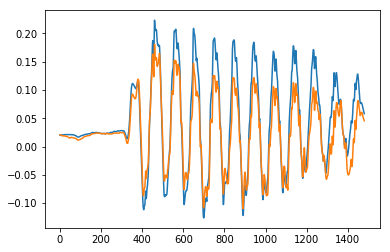

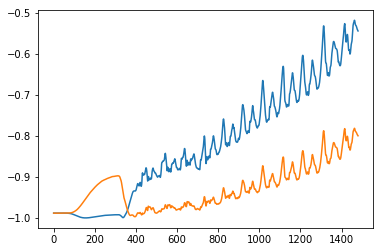

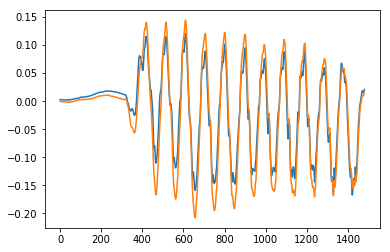

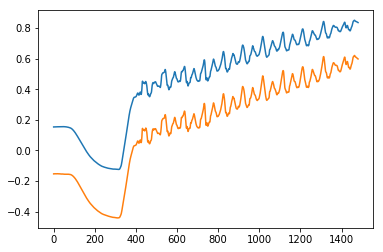

In [130]:
!/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf 0.0 0.0

reference_output = np.genfromtxt("/home/val/Desktop/CSVdata/CL_40_1_orientation.csv", delimiter=",", skip_header=1)
gareth_output = np.genfromtxt("/home/val/Desktop/gareth_output.csv", delimiter=',')

reference_quat = reference_output[:, 0:4]
gareth_quat = gareth_output[:, 0:4]

gareth_bias = gareth_output[:, 4:7]


for i in range(4):
    plt.plot(gareth_quat[:,i])
    plt.plot(reference_quat[:,i])
    plt.show()
    
#for i in range(3):
    #plt.plot(gareth_bias[:,i])
    #plt.show()

('errors shape : ', (5, 5, 4))


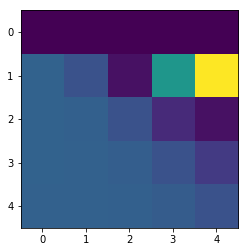

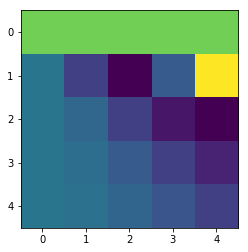

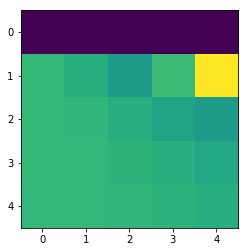

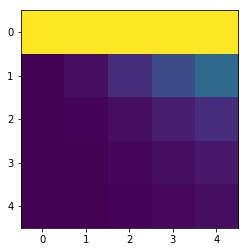

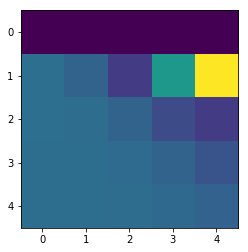

[[ 0.34335769  0.34335769  0.34335769  0.34335769  0.34335769]
 [ 0.63389775  0.59671057  0.48449298  0.76871943  1.14213443]
 [ 0.63363949  0.62942882  0.5964998   0.52481561  0.48442574]
 [ 0.63320859  0.63198506  0.62264392  0.59614803  0.55134544]
 [ 0.63260555  0.63205283  0.62844195  0.61728864  0.59565753]]
(' argmin : ', 0)
(' min error : ', 0.34335769380572667)
(' min error acc cov : ', 0.0)


In [129]:
acc_cov_points = 5
gyr_cov_points = 5

acc_cov_list = np.linspace(0,1, acc_cov_points)
gyr_cov_list = np.linspace(0,10, gyr_cov_points)

#print("acc cov list ", acc_cov_list)

errors = np.zeros([len(acc_cov_list), len(gyr_cov_list), 4])
print("errors shape : ", errors.shape)


for acc_idx in range(len(acc_cov_list)):
    acc_cov = acc_cov_list[acc_idx]
    
    for gyr_idx in range(len(gyr_cov_list)):
        
        gyr_cov = gyr_cov_list[gyr_idx]
        
        #print("running code with args ", acc_cov, gyr_cov)
        
        output = !/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov
        #!/home/val/Desktop/kr_attitude_eskf/build/kr_attitude_eskf $acc_cov $gyr_cov

        reference_output = np.genfromtxt("/home/val/Desktop/CSVdata/CL_40_1_orientation.csv", delimiter=",", skip_header=1)
        gareth_output = np.genfromtxt("/home/val/Desktop/gareth_output.csv", delimiter=',')

        reference_quat = reference_output[:, 0:4]
        gareth_quat = gareth_output[:, 0:4]

        gareth_bias = gareth_output[:, 4:7]


        for i in range(4):
            errors[acc_idx, gyr_idx, i] = ComputeError(reference_quat[:,i], gareth_quat[:,i])      


        file_index = file_index + 1


#done loop
mean_error= np.mean(errors, axis=2)

for i in range(4):
    plt.imshow(errors[:,:,i])
    plt.show()

plt.imshow(mean_error)
plt.show()

print(mean_error)

min_error = np.min(mean_error)
min_error_index = np.argmin(mean_error)
min_acc_cov = acc_cov_list[min_error_index]

print(" argmin : ", min_error_index)

print(" min error : ", min_error)
print(" min error acc cov : ", min_acc_cov)


